# Solving Ordinary Differential Equations (ODEs) Numerically

In this class we have already begun to explore techniques for solving initial value problems with first-order differential equations, of the general form

$$\frac{dx}{dt} = f(x, t)$$

Specifically, we have explored Euler's method in Numerical Basics, and a slight variation called the Euler-Cromer method in Problem Set 1. 

&#128310; Write down Euler's method as an expression for $x_{k+1}$, i.e. $x$ at timestep $k + 1$.

$$ x_{k+1} = x_k + \Delta t f(x_k, t_k) $$

As we touched upon in Numerical Basics, Euler's method is okay for some simple problems, but it is not really accurate enough for everyday use. How might we go about deriving a higher-accuracy method? You will recall that we derived Euler's method using a Taylor expansion, which we truncated at first order:

$$x(t + \Delta t) = x(t) + \frac{dx}{dt}\Delta t + \frac{1}{2}(\Delta t)^2 \frac{d^2x}{dt^2} + ...$$

 A natural place to turn if we need higher accuracy is to include the next term in the Taylor series. 

 &#128310; Write down an expression for $x_{k+1}$ that would be Euler's method with this extra term, for $\frac{dx}{dt} = f(x, t)$.

$$x_{k+1} = x_k + \dot{x_k} \Delta t + \frac{1}{2}(\Delta t)^2 \ddot{x_k} = x_k + f(x_k, t_k) \Delta t + \frac{1}{2}(\Delta t)^2 f(f(x_k, t_k), t_k)$$

&#128310; The expression you have just written down could work in some cases, but it is not generally very useful. Why? What does it require us to know? 

To solve this, we'd have to solve for every derivative of $f(x, t)$ from the first given order to the 2nd derivative, and possibly more given how accurate we're going to try to be. Solving this analytically and inputting the solution would be tedius.

Fortunately, there are higher-order methods that avoid this difficulty. 

## Runge-Kutta Methods



We will now learn a class of methods called "Runge-Kutta methods". There are a number of these of different order, and in fact Euler's method can be considered the first-order Runge-Kutta method. 

### The Second-Order Runge-Kutta Method

The second-order Runge-Kutta method estimates $x(t + \Delta t)$ by extrapolating using the slope of the function evaluated at $t + \frac{1}{2}\Delta t$. Mathematically, we can write the second-order Runge-Kutta method as follows:

$$x_{k+1} = x_k + \Delta t f(x_k + \frac{\Delta t}{2}f(x_k, t_k), t_k + \frac{\Delta t}{2})$$

Equivalently, we can express this as

$$x_{k + 1} = x_k + \Delta t f_2$$

where

$$f_1 = f(x_k, t_k)$$
$$f_2 = f(x_k + \frac{\Delta t}{2}f_1, t_k + \frac{\Delta t}{2})$$

&#128309; Import numpy and matplotlib as usual. It's time to start coding!

In [106]:
import numpy as np
import matplotlib.pyplot as plt

&#128309; Code up a function `rk2step` that takes the following inputs: </br>
`func`: the function $f(x, t)$ </br>
`xk`  : the current $x$, or current state of your system at timestep $k$ </br>
`k`   : the current timestep $k$ </br>
`deltat`: the timestep $\Delta t$ </br>
And outputs $x_{k+1}$

In [107]:
def rk2step(func, xk, k, deltat): # using k as t here. 
    f1 = func(xk, k)
    f2 = func(xk + 0.5*deltat*f1, k + 0.5*deltat)
    return xk + deltat*f2 # equal to x_k+1

&#128310; Comment on your `rk2step` function. What modification would you make to turn it from a second-order Runge-Kutta solver to an Euler's method solver?

To turn it into a Euler's method solver, I would just have to replace f2 with f1, hence using the derivative instead of the derivative of a small forward step of the derivative. By removing that small step (error correcting adjustment), our Runge-Kutta solver becomes a Euler's Method solver. This would reduce to simply the first order Euler's method.

&#128309; Write some code that uses your function `rk2step` to solve a differential equation in `N` steps, given initial conditions `x0` and `k0` and a timestep `deltat`. Store the time at each timestep and the state of your system $x$ at each timestep using numpy arrays, and return those arrays.

In [127]:
x0, k0, deltat, N = 2, 0, 0.1, 10 # define initial parameters
def diff_eq(x, t): return x**2; # define function

# intialize states and arrays
states = np.zeros(N)
times = np.zeros(N)

state, time = x0, k0

for index in range(N): # run 10 times
    states[index] = state
    times[index] = time

    # update state and time
    state = rk2step(diff_eq, state, time, deltat)
    time += deltat

print(states)
print(times)

[2.00000000e+00 2.48400000e+00 3.26381277e+00 4.70510576e+00
 8.08304802e+00 2.09649151e+01 2.05360424e+02 5.35667559e+05
 2.05851398e+19 4.48905879e+73]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


&#128309; Use your implementation of the second-order Runge-Kutta method to solve the differential equation 

$$\frac{dx}{dt} = -x^3 + \sin t$$

from $t=0$ to $t=10$, given the initial condition $x = 0$ at $t = 0$. (Note: you tackled this same differential equation with Euler's method in Numerical Basics.)

Plot $x(t)$ as a function of $t$ for $N=10, 20, 30, 50, 100$, all on the same plot. You can use more values of N if you want. Label everything!

*Optional plotting tip*: you may find it useful to plot your solutions using a colormap that assigns colors based on N in some principled way. One way to do this is to grab your colors directly from a <a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html" target="_blank" rel="noopener noreferrer">matplotlib colormap</a>. The following code snippet shows you how to do this. 

```python
import matplotlib 
cmap = matplotlib.colormaps["viridis"]

# plot y vs x in the color that is the midpoint of the colormap "viridis"
plt.plot(x, y, color=cmap(0.5))
```



In [133]:
import matplotlib
cmap = matplotlib.colormaps["viridis"]

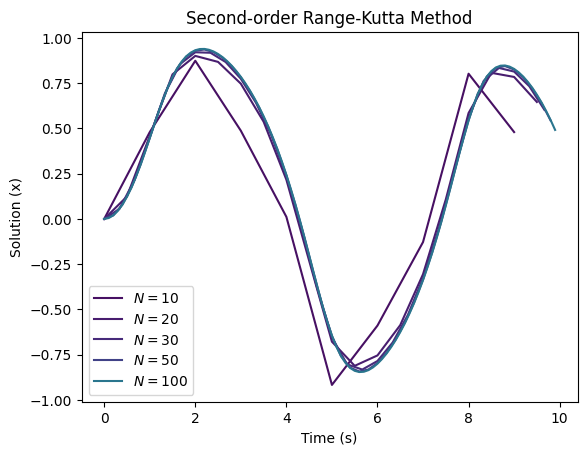

In [138]:

def Range_Kutta_sol(N_vals):
    x0, k0, k_max = 0, 0, 10 # define initial parameters
    deltat = (k_max - k0)/(N_vals) # calculate deltat via t range / number of points

    def diff_eq(x, t):
        return -x**3 + np.sin(t)

    # intialize states and arrays
    states = np.zeros(N_vals)
    times = np.zeros(N_vals)

    state = x0

    index = 0 # define counter for tracking position in arrays
    for time in np.arange(k0, k_max, deltat):

        states[index] = state
        times[index] = time

        # update counter and state
        index += 1
        state = rk2step(diff_eq, state, time, deltat)

    return times, states

for N_val in [10, 20, 30, 50, 100]:
    plt.plot(Range_Kutta_sol(N_val)[0], Range_Kutta_sol(N_val)[1], label=(f"$N={N_val}$"), color=cmap(N_val))

plt.xlabel("Time (s)")
plt.ylabel("Solution (x)")
plt.title("Second-order Range-Kutta Method")
plt.legend()
plt.show()

&#128310; Comment on your plot. At what $N$ does the answer visually start to converge?

The answer starts to visually converge only once we have N values at around 20-30. Before then, the solution appears discontinious. Especailly at N = 10, we know that the solution appears distinctly discontinuous. We should also note this differntial equation seems to be a sinusoidal function which makes sense given a portion of our function is the sin(x).  

### The Fourth-Order Runge-Kutta Method

We can extend this line of reasoning, and approximate our derivative step using more complicated estimates that cancel higher-order terms in the Taylor expansion. For a great many applications, the "sweet spot" of accuracy and efficiency is the fourth-order Runge-Kutta method. This method is computed as follows:

$$x_{k+1} = x_k + \frac{\Delta t}{6}\left(f_1 + 2f_2 + 2f_3 + f_4\right)$$

where

$$f_1 = f(x_k, t_k)$$
$$f_2 = f(x_k + \frac{\Delta t}{2}f_1, t_k + \frac{\Delta t}{2} )$$
$$f_3 = f(x_k + \frac{\Delta t}{2}f_2, t_k + \frac{\Delta t}{2} )$$
$$f_4 = f(x_k + \Delta t f_3, t_k + \Delta t)$$

&#128309; Implement a function a function `rk4step` that takes the same inputs as `rk2step`, namely: </br>
`func`: the function $f(x, t)$ </br>
`xk`  : the current $x$, or current state of your system at timestep $k$ </br>
`k`   : the current timestep $k$ </br>
`deltat`: the timestep $\Delta t$ </br>
And outputs $x_{k+1}$

In [111]:
def rk4step(func, xk, k, deltat): # using k for time
    
    f1 = func(xk, k)
    f2 = func(xk + 0.5*deltat*f1, k + 0.5*deltat)
    f3 = func(xk + 0.5*deltat*f2, k + 0.5*deltat)
    f4 = func(xk + deltat*f3, k + deltat)

    return xk + (deltat/6)*(f1 + 2*f2 + 2*f3 + f4)

&#128309; Write function that calls either `rk2step` or `rk4step`, depending on user-specified inputs. Your function should use the specified solver to solve a differential equation in `N` steps, given initial conditions `x0` and `k0` and a timestep `deltat`. Store the time at each timestep and the state of your system $x$ at each timestep using numpy arrays, and return those arrays. 

In [112]:
def Range_Kutta_solver(solver, diff_eq, N, x0, k0, deltat):
    kmax = N*deltat + k0 # find kmax

    # intialize states and arrays
    states = np.zeros(N)
    times = np.zeros(N)

    state = x0

    index = 0 # define counter for tracking position in arrays
    for time in np.arange(k0, kmax, deltat):

        states[index] = state
        times[index] = time

        # update counter and state
        index += 1
        state = solver(diff_eq, state, time, deltat)

    return times, states

&#128309; Now use your fourth-order Runge-Kutta scheme to create a similar plot to what you did with `rk2step`, i.e., solve 
$$\frac{dx}{dt} = -x^3 + \sin t$$
for various choices of N.  

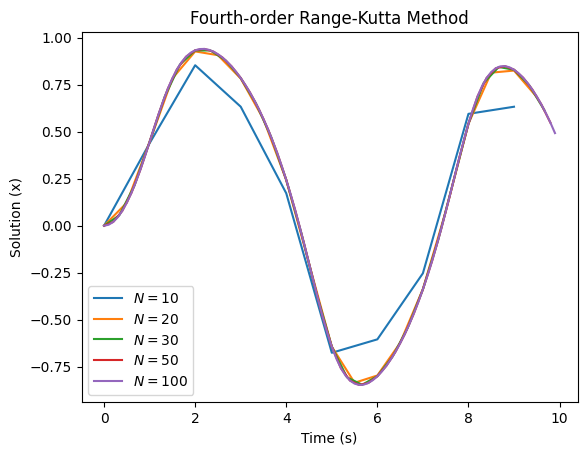

In [113]:
def diff_eq(x, t): return -x**3 + np.sin(t) # same diff_eq as above

# plots
for N_val in [10, 20, 30, 50, 100]:
    plt.plot(
        Range_Kutta_solver(rk4step, diff_eq, N_val, 0, 0, 10/N_val)[0], 
        Range_Kutta_solver(rk4step, diff_eq, N_val, 0, 0, 10/N_val)[1], 
        label=(f"$N={N_val}$"))

# labels
plt.xlabel("Time (s)")
plt.ylabel("Solution (x)")
plt.title("Fourth-order Range-Kutta Method")
plt.legend()
plt.show()

&#128310; Comment on your plot. How does your solution accuracy seem to compare for similar N between second- and fourth-order Runge-Kutta?

For the existing range, there appears to be marginal contribution, but on the whole both graphs appear relatively accurate. Here, I'd be pretty confident that N = 20 is correct enough to give a strong estimate of the total structure. 

## RC circuit

Consider the following very simple electronic circuit with one resistor and one capacitor. 

<div><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/1st_Order_Lowpass_Filter_RC.svg/640px-1st_Order_Lowpass_Filter_RC.svg.png" alt="RC circuit diagram" style="background:#FFFFFF"></div>


The diagram shows a simple RC circuit with one resistor and one capacitor. The input signal $\mathrm{V}_{in}$ is applied to the series combination of the resistor and then capacitor, and the output signal $\mathrm{V}_{out}$ is the voltage across the capacitor. 

This is an example of an RC filter circuit: a signal sent in on the left will come out filtered on the right. This is specifically a low-pass filter, which attenuates high-frequency signals. 

For a time-variable input signal $\mathrm{V}_{in}(t)$, we can derive a simple ODE that describes the behavior of this circuit:

$$\frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in} - V_{out})$$

where R is the resistance of the resistor and C is the capacitance of the capacitor. Let's explore what happens when we send a square wave into our circuit.

&#128309; First, write a function that returns the amplitude of our square wave at a time t. Our wave is defined by the following:

$$V_{in}(t) = \begin{cases}
    1, & \text{if } \lfloor 2t \rfloor~\mathrm{is}~\mathrm{even}\\
    -1, & \text{if } \lfloor 2t \rfloor~\mathrm{is}~\mathrm{odd}\\
\end{cases}$$

where $\lfloor x \rfloor$ means $x$ rounded down to the next lowest integer. Check out the numpy function `floor`!

In [114]:
def input_signal(t):
    return -1 if np.floor(2*t) % 2 else 1 # 1 line implentation of 1 or -1

&#128309; Plot $V_{in}$ to make sure it is behaving as expected.

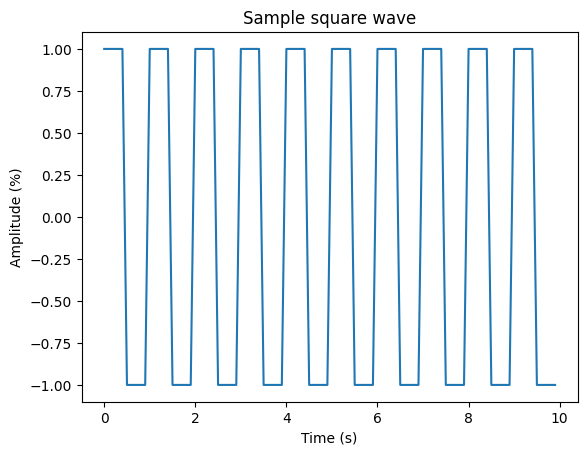

In [115]:
times = np.arange(0, 10, 0.1)
signal = [input_signal(time) for time in times]

# plots
plt.plot(times, signal, label="Input Signal")

# labels
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (%)")
plt.title("Sample square wave")
plt.show()

&#128309; Next, write a function that implements the righthand side of our ODE for $V_{out}$.

In [116]:
def output_signal(output, time, RC=0.1):
    return (input_signal(time) - output)/RC

&#128309; Use the fourth-order Runge-Kutta method to compute the output of your circuit from $t = 0$ s to $t = 10$ s for a circuit with $RC = 0.1$ seconds. Return numpy arrays that store $V_{out}(t)$ and your timesteps. 

In [117]:
# defined RC = 0.1 in output signal function itself.
times, output = Range_Kutta_solver(rk4step, output_signal, 100, 0, 0, 0.1)

&#128309; Plot your input and output waveforms on the same plot, labeling both. 

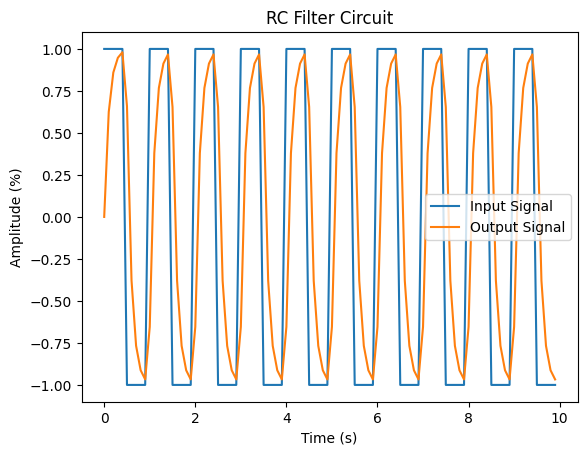

In [118]:
times = np.arange(0, 10, 0.1)
signal = [input_signal(time) for time in times] # calculate input signal

# plots
plt.plot(times, signal, label="Input Signal")
plt.plot(times, output, label="Output Signal")

# labels
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (%)")
plt.title("RC Filter Circuit")
plt.legend()
plt.show()

&#128309; Try varying your time constant $RC$ up to 1 s or down to 0.01 s, and plot the results.

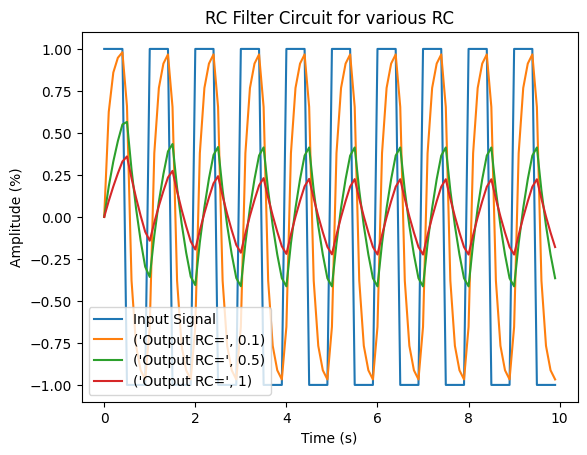

In [119]:
times = np.arange(0, 10, 0.1)
signal = [input_signal(time) for time in times] # calculate input signal

# plots
plt.plot(times, signal, label="Input Signal")

# recalculating output signal for various RC
for RC_iter in [0.1, 0.5, 1]:
    # define new output signal function to specify RC value
    def output_signal(output, time, RC=RC_iter): return (input_signal(time) - output)/RC # not very efficient, I know
    times, output = Range_Kutta_solver(rk4step, output_signal, 100, 0, 0, 0.1) # calculate output signals and times
    plt.plot(times, output, label=("Output RC=", RC_iter)) # plot output signal

# plot labels
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (%)")
plt.title("RC Filter Circuit for various RC")
plt.legend()
plt.show()

&#128310; Describe and comment on your results. 

Here we can recognize that the low pass filter is working, bounding our amplitude to smaller ranges. It also flattens out the shifts in amplitude, likely becaues the capacitor acts as a regulating force rather than a simple dampener like the resistor. 

## Acknowledgments

S.E. Clark 2024, with several parts adapted from Newman 2013